In [157]:
import pandas as pd
import numpy as np

In [158]:
df = pd.read_csv("csgo_players.csv")
df.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22


In [159]:
df.describe()

,player_id,age,total_kills,total_deaths,damage_per_round,grenade_dmg_per_round,maps_played,rounds_played,kills_per_death,kills_per_round,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,10025.051788,25.852035,15324.868064,14734.414303,75.110727,4.073243,843.347719,22172.040691,1.035487,0.688385,...,820.546239,160.884094,17.027127,9498.584464,2115.836005,840.594328,2643.271270,197.348952,65.076449,1.034488
std,4670.266229,3.697220,7616.041119,7092.810830,4.121221,1.187595,406.503953,10719.501993,0.091612,0.044627,...,428.725129,89.041086,10.830193,5615.356769,3356.026270,513.481262,1322.528164,124.400360,75.641726,0.072618
min,7.000000,17.000000,5530.000000,6166.000000,59.700000,1.400000,379.000000,9815.000000,0.740000,0.520000,...,192.000000,33.000000,0.000000,1140.000000,7.000000,105.000000,669.000000,40.000000,3.000000,0.770000
25%,7853.500000,23.000000,9222.000000,9116.000000,72.400000,3.200000,509.000000,13459.000000,0.980000,0.660000,...,483.500000,94.000000,9.000000,5474.000000,206.000000,465.500000,1608.500000,108.000000,26.500000,0.990000
50%,9766.000000,26.000000,13308.000000,12900.000000,74.900000,3.900000,738.000000,19559.000000,1.030000,0.690000,...,689.000000,136.000000,15.000000,7797.000000,583.000000,722.000000,2239.000000,164.000000,45.000000,1.030000
75%,13143.000000,28.000000,19404.000000,18366.500000,77.750000,4.800000,1073.000000,28229.000000,1.095000,0.720000,...,1044.500000,207.000000,23.000000,12665.500000,2665.500000,1097.500000,3306.000000,248.500000,75.000000,1.080000
max,20113.000000,36.000000,40979.000000,38534.000000,91.700000,9.200000,2219.000000,58263.000000,1.450000,0.860000,...,2414.000000,564.000000,71.000000,30174.000000,20663.000000,3495.000000,7496.000000,1003.000000,1001.000000,1.320000


In [160]:
df.columns

Index(['player_id', 'nickname', 'real_name', 'age', 'country', 'current_team',
       'teams', 'total_kills', 'total_deaths', 'headshot_percentage',
       'damage_per_round', 'grenade_dmg_per_round', 'maps_played',
       'rounds_played', 'kills_per_death', 'kills_per_round',
       'assists_per_round', 'deaths_per_round', 'saved_by_teammate_per_round',
       'saved_teammates_per_round', 'rounds_with_kills', 'kill_to_death_diff',
       'total_opening_kills', 'total_opening_deaths', 'opening_kill_ratio',
       'opening_kill_rating', 'team_win_percent_after_first_kill',
       'first_kill_in_won_rounds', '0_kill_rounds', '1_kill_rounds',
       '2_kill_rounds', '3_kill_rounds', '4_kill_rounds', '5_kill_rounds',
       'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills',
       'grenade_kills', 'other_kills', 'rating'],
      dtype='object')

In [161]:
features1 = ['rounds_played', 'damage_per_round', 'kills_per_death', 'kills_per_round', 'assists_per_round', 'deaths_per_round',
             '0_kill_rounds', '5_kill_rounds', 'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills', 'rating']
df1 = df[features1]
df1.head()

,rounds_played,damage_per_round,kills_per_death,kills_per_round,assists_per_round,deaths_per_round,0_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,rating
0,26803,88.0,1.37,0.84,0.12,0.61,12607,71,8261,8552,1290,4262,1.32
1,41491,86.4,1.34,0.86,0.10,0.64,18932,64,14717,13451,901,6057,1.25
2,23451,78.6,1.45,0.77,0.11,0.53,11501,30,3791,10580,550,3008,1.26
3,10913,80.4,1.37,0.80,0.10,0.59,5128,8,2664,4348,181,1459,1.23
4,10701,80.2,1.30,0.79,0.10,0.61,5213,14,2545,4412,264,1209,1.22


In [162]:
import warnings
warnings.filterwarnings("ignore")
df1['0_kill_ratio'] = df1['0_kill_rounds']/df1['rounds_played']
df1['5_kill_ratio'] = df1['5_kill_rounds']/df1['rounds_played']
df1['rifle_kills_ratio'] = df1['rifle_kills']/df1['rounds_played']
df1['sniper_kills_ratio'] = df1['sniper_kills']/df1['rounds_played']
df1['smg_kills_ratio'] = df1['smg_kills']/df1['rounds_played']
df1['pistol_kills_ratio'] = df1['pistol_kills']/df1['rounds_played']

In [163]:
features_drop = ['0_kill_rounds', '5_kill_rounds', 'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills']
df1 = df1.drop(columns=features_drop)

In [164]:
df1 = ((df1 - df1.min())/(df1.max() - df1.min())) * 9 + 1
df1.isnull().sum().sum()

0

In [165]:
df1.head()

,rounds_played,damage_per_round,kills_per_death,kills_per_round,assists_per_round,deaths_per_round,rating,0_kill_ratio,5_kill_ratio,rifle_kills_ratio,sniper_kills_ratio,smg_kills_ratio,pistol_kills_ratio
0,4.155796,8.959375,8.985915,9.470588,4.6,4.272727,10.000000,1.796818,10.000000,4.741042,6.634091,4.061223,8.266384
1,6.884330,8.509375,8.605634,10.000000,2.8,5.500000,8.854545,1.000000,6.240752,5.464773,6.724683,2.101467,7.262180
2,3.533108,6.315625,10.000000,7.617647,3.7,1.000000,9.018182,2.933694,5.346378,2.459625,8.970243,2.230390,5.896681
3,1.203971,6.821875,8.985915,8.411765,2.8,3.454545,8.527273,1.770788,3.490654,3.743215,8.037627,1.720857,6.314925
4,1.164589,6.765625,8.098592,8.147059,2.8,4.272727,8.363636,2.748108,5.444995,3.645388,8.283014,2.320718,4.718377


In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Features'] = df1.columns
vif_data['VIF'] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]
vif_data

,Features,VIF
0,rounds_played,4.822140
1,damage_per_round,176.068422
2,kills_per_death,2032.957619
3,kills_per_round,2325.878701
4,assists_per_round,43.009488
5,deaths_per_round,933.313744
6,rating,186.151571
7,0_kill_ratio,547.451457
8,5_kill_ratio,25.608757
9,rifle_kills_ratio,3007.885032


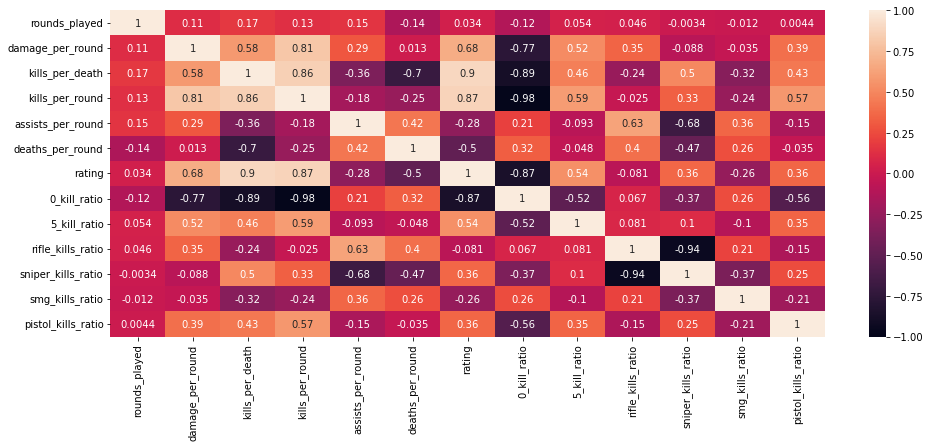

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

In [168]:
df1 = df1.drop(columns=['kills_per_round', '0_kill_ratio', 'rifle_kills_ratio', 'kills_per_death'])
vif_data = pd.DataFrame()
vif_data['Features'] = df1.columns
vif_data['VIF'] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]
vif_data

,Features,VIF
0,rounds_played,4.000826
1,damage_per_round,85.168607
2,assists_per_round,30.555770
3,deaths_per_round,32.240971
4,rating,66.970583
5,5_kill_ratio,22.610767
6,sniper_kills_ratio,4.495569
7,smg_kills_ratio,11.886732
8,pistol_kills_ratio,36.824932


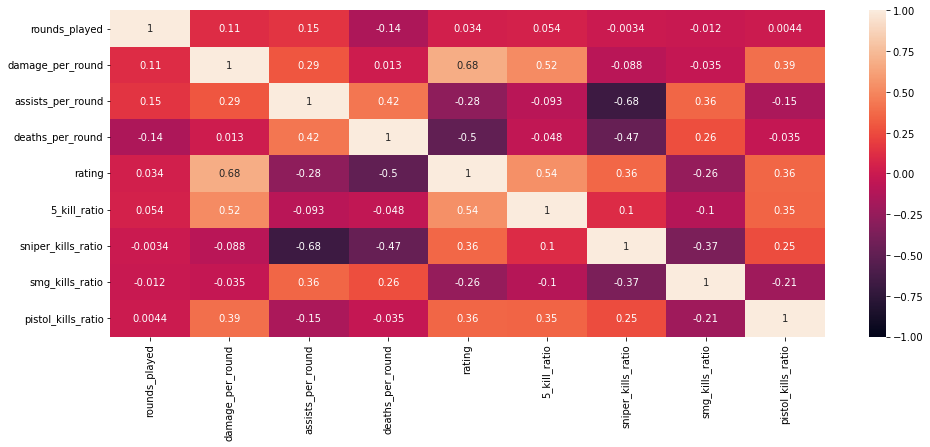

In [169]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

In [170]:
def init_cent(k, dataframe):
    centroids = []
    for i in range (k):
        centroid = dataframe.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [171]:
centroids = init_cent(5, df1)
centroids

,0,1,2,3,4
rounds_played,9.268824,1.709070,2.195220,1.508628,2.636229
damage_per_round,5.725000,4.656250,6.287500,6.878125,5.106250
assists_per_round,8.200000,7.300000,7.300000,7.300000,4.600000
deaths_per_round,6.318182,5.500000,6.727273,7.954545,5.500000
rating,5.745455,5.909091,4.763636,4.600000,5.909091
5_kill_ratio,4.188791,4.142481,4.923719,4.772701,4.966433
sniper_kills_ratio,7.595395,7.055665,7.196471,8.964429,1.539030
smg_kills_ratio,3.283781,4.139466,3.331079,4.266607,2.430134
pistol_kills_ratio,6.233178,6.428194,4.740273,5.271637,5.605636


In [172]:
distances = centroids.apply(lambda x: np.sqrt(((df1 - x)**2).sum(axis=1)))
distances

,0,1,2,3,4
0,10.549023,9.375949,9.527253,10.154344,9.820075
1,7.769158,8.939623,8.674407,9.578978,8.538757
2,9.846023,7.615717,8.457378,9.493522,9.406663
3,10.699360,6.594349,7.363925,8.129659,8.042969
4,10.594021,6.477743,6.557378,7.287705,7.886684
...,...,...,...,...,...
806,10.898600,9.278178,8.688862,10.167332,7.842029
807,12.167833,8.841859,8.424004,9.805554,7.162468
808,9.966989,10.533521,9.931130,11.635439,8.372108
809,13.432365,10.344123,9.674751,10.758694,9.077080


In [173]:
distances['min_dist'] = distances.idxmin(axis=1)

In [174]:
distances

,0,1,2,3,4,min_dist
0,10.549023,9.375949,9.527253,10.154344,9.820075,1
1,7.769158,8.939623,8.674407,9.578978,8.538757,0
2,9.846023,7.615717,8.457378,9.493522,9.406663,1
3,10.699360,6.594349,7.363925,8.129659,8.042969,1
4,10.594021,6.477743,6.557378,7.287705,7.886684,1
...,...,...,...,...,...,...
806,10.898600,9.278178,8.688862,10.167332,7.842029,4
807,12.167833,8.841859,8.424004,9.805554,7.162468,4
808,9.966989,10.533521,9.931130,11.635439,8.372108,4
809,13.432365,10.344123,9.674751,10.758694,9.077080,4


In [175]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df1 - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [176]:
labels = get_labels(df1, centroids)
labels.value_counts()

4    624
1    104
0     42
2     41
dtype: int64

In [177]:
new_centroids = df1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
new_centroids

,0,1,2,4
rounds_played,8.004847,2.402519,2.292394,2.675841
damage_per_round,5.214651,5.016959,5.119792,5.232475
assists_per_round,5.200900,3.239474,3.780143,5.872405
deaths_per_round,6.183523,4.999219,6.545320,6.751124
rating,5.260337,6.148838,5.569251,5.007046
5_kill_ratio,3.604386,3.471649,3.981110,3.401000
sniper_kills_ratio,3.389707,7.033382,6.327166,1.465676
smg_kills_ratio,2.811468,2.424273,2.463098,3.353304
pistol_kills_ratio,5.296735,5.855924,4.938766,4.981297


In [178]:
def new_cent(k, dataframe, labels):
    centroids = dataframe.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [179]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [180]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

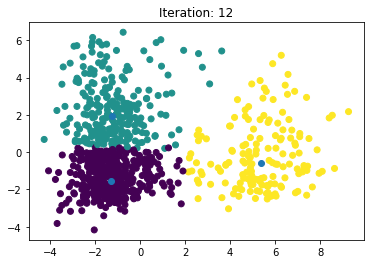

In [181]:
max_iteration = 100
k=3
old_centroids = pd.DataFrame()
centroids = init_cent(k, df1)
i=0
while i<max_iteration and not old_centroids.equals(centroids):
    old_centroids = centroids
    labels = get_labels(df1, centroids)
    centroids = new_cent(k,df1, labels)
    plot_cluster(df1, labels, centroids, i)
    i=i+1

In [182]:
centroids

,0,1,2
rounds_played,1.929777,5.214053,2.590841
damage_per_round,4.983082,5.682067,5.028199
assists_per_round,5.798881,6.209518,3.180163
deaths_per_round,6.987100,6.463496,5.220627
rating,4.762502,5.353750,6.151339
5_kill_ratio,3.253663,3.634987,3.689810
sniper_kills_ratio,1.475698,1.548832,7.114393
smg_kills_ratio,3.381143,3.307743,2.360040
pistol_kills_ratio,4.934016,5.109458,5.551833


In [183]:
from sklearn.cluster import KMeans

In [184]:
kms = KMeans(3)
kms.fit(df1)
centroids2 = kms.cluster_centers_
centroids2

array([[3.00602708, 5.11838235, 3.35882353, 5.37165775, 6.22352941,
        3.82579229, 7.21786043, 2.48075632, 5.64998826],
       [2.18094484, 5.2188764 , 5.95505618, 7.04443309, 4.99309499,
        3.47520926, 1.57896834, 3.53286407, 5.06896867],
       [5.83203917, 5.73041373, 6.31971831, 6.51024328, 5.384379  ,
        3.63375774, 1.73006477, 3.43783533, 5.13900318]])

In [185]:
centroids2_df = pd.DataFrame(centroids2, columns=centroids.index).T
centroids2_df

,0,1,2
rounds_played,3.006027,2.180945,5.832039
damage_per_round,5.118382,5.218876,5.730414
assists_per_round,3.358824,5.955056,6.319718
deaths_per_round,5.371658,7.044433,6.510243
rating,6.223529,4.993095,5.384379
5_kill_ratio,3.825792,3.475209,3.633758
sniper_kills_ratio,7.217860,1.578968,1.730065
smg_kills_ratio,2.480756,3.532864,3.437835
pistol_kills_ratio,5.649988,5.068969,5.139003


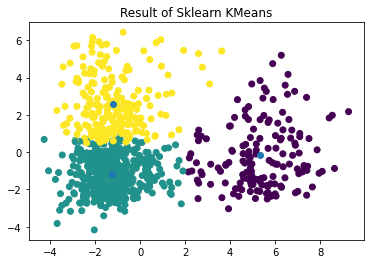

In [186]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df1)
centroids_2d = pca.transform(centroids2_df.T)
labels = get_labels(df1, centroids2_df)
plt.title('Result of Sklearn KMeans')
plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
plt.show()